# Artificial Neural Networks

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" align="left" src="https://i.creativecommons.org/l/by-nc-sa/4.0/80x15.png" /></a>&nbsp;| Dennis G. Wilson | <a href="https://d9w.github.io/deep-learning-intro/">https://d9w.github.io/deep-learning-intro/</a><br>Based on the Supaero Data Science Deep Learning class: https://supaerodatascience.github.io/deep-learning/

1. [Biological neural networks](#sec1)
2. [Why invent artificial neural networks?](#sec2)
2. [Artificial neural networks](#sec3)
3. [Propagating values through a network](#sec4)
3. [Learning the weights of a neural network (regression case)](#sec5)
4. [Neural networks for classification](#sec6)

# 1. <a id="sec1"></a> Biological neural networks

In 1839, *Cell theory* introduces the idea that living bodies are made of cells.<br>
**Mikroskopische Untersuchungen über die Uebereinstimmung in der Struktur und dem Wachsthum der Thiere und Pflanzen.**<br>
Schwann, Theodor. Berlin: Sander. (1839).

But due to limitations in microsopy in the XIXth century, no one had observed the basic constituents of nerve tissue and the nervous system stood as an exception to cell theory.

In the first issue of the Revista Trimestral de Histología Normal y Patológica (May, 1888), Santiago Ramón y Cajal shows a physical separation between individual cells at the axon/dendrite connection (in chickens). This lays the basis of the **neuron doctrine** which lead to his 1906 Nobel prize for Physiology or Medecine.<br>
**Neuron theory, the cornerstone of neuroscience, on the centenary of the Nobel Prize award to Santiago Ramón y Cajal**.<br>
López-Muñoz, F., Boya, J., & Alamo, C. Brain research bulletin, 70(4-6), 391-405. (2006).

Neuron doctrine:
- neurons are the basis constituent of the nervous system
- dendrites $\rightarrow$ nucleus $\rightarrow$ axon $\rightarrow$ synapses (Law of Dynamic Polarization).
- electrical impulses.
- chemical neuro-transmitters.

<img src="img/neuron_bio.png" width="600px"></img>

# 2. <a id="sec2"></a> Why invent "artificial neural networks"?

Our rationale goes as follows.<br>
The human brain processes information efficiently, can we design an artificial computing method that mimics it?<br>
But computers process bits, so our artificial neurons should take logical values as inputs.

Let's take inspiration from the biological neuron for that and make a simplified model of a neuron. Suppose an input signal in the form of a binary vector $x$. The elements of $x$ can indicate binary statements which are true or false, such as "it's raining" or "I have an umbrella". We will model the *activation* of a neuron as:
$$f(x)=\left\{\begin{array}{ll} 0 & \textrm{if }w^T x+b\leq 0 \\ 1 & \textrm{otherwise}\end{array}\right.=step\left(w^Tx + b\right),$$
where $step$ is Heaviside's step function.

We will call such a function *Rosenblatt's Perceptron*.
Basically, a perceptron is a linear separation rule.
Intuitively, it is a machine that weights evidence $x$ and compares it to threshold $b$ in order to make a decision $f(x)$.

Although perceptrons were invented in the 50's and are not really representative of modern artificial neural networks, manipulating them conveys some of the important intuitions about artificial networks, so we will go into a "back to the future" mode for the next paragraphs before going any further.

<div class="alert alert-warning">
    
**Exercice: Back to the future, logical gates.** <br>
Take Rosenblatt's perceptron and find input weights that correspond to AND, OR and NAND gates (for two binary inputs).</div>

<div class="alert alert-danger"><a href="#answer1" data-toggle="collapse"><b>Ready to see the answer? (click to expand)</b></a><br>
<div id="answer1" class="collapse">

Rosenblatt's perceptron is the function $step(w_1 x_1 + w_2 x_2 +b)$. 

With $(w_1, w_2, b) = (2,2,-1)$ we get an OR gate. 

With $(w_1, w_2, b) = (2,2, -3)$ we get an AND gate. 

With $(w_1, w_2, b) = (-2,-2,3)$ we get a NAND gate.
</div>
</div>

In [1]:
import numpy as np

def perceptron(w,b,x):
    return np.heaviside(np.dot(x,w)+b,0)

x = np.zeros((4,2))
x[1,0] = 1.
x[2,1] = 1.
x[3,0] = 1.
x[3,1] = 1.

print("input values:\n", x)

def OR(x):
    w = np.array([2.,2.])
    b = -1.
    return perceptron(w,b,x)
print("testing OR gate:", OR(x))

def AND(x):
    w = np.array([2.,2.])
    b = -3.
    return perceptron(w,b,x)
print("testing AND gate:", AND(x))

def NAND(x):
    w = np.array([-2.,-2.])
    b = 3.
    return perceptron(w,b,x)
print("testing NAND gate:", NAND(x))

input values:
 [[0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 1.]]
testing OR gate: [0. 1. 1. 1.]
testing AND gate: [0. 0. 0. 1.]
testing NAND gate: [1. 1. 1. 0.]


<div class="alert alert-warning">
    
**Exercice: Back to the future, the XOR affair.** <br> 
Does it seem possible to describe a XOR gate with a perceptron? Building a XOR function can be seen as a classification problem; what is the family of classification problems that can be tackled by perpectrons (hint: recall the beginning of the SVM class)?</div>

<div class="alert alert-danger"><a href="#answer2" data-toggle="collapse"><b>Ready to see the answer? (click to expand)</b></a><br>
<div id="answer2" class="collapse">
    
No, it is actually not possible to model a XOR gate with a perceptron. Since perceptrons implement a threshold on a linear combination of the inputs, they can only separate (shatter, in VC theory) classes that are... linearly separable. XOR is a typical example of non-linearly separable data.
</div>
</div>

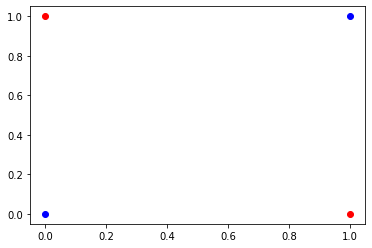

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter([0,1],[0,1],c='b')
plt.scatter([1,0],[0,1],c='r');

<div class="alert alert-success">
    
**Back to the future, networks of perceptrons.**<br> 
It is possible to connect perceptrons together to get a XOR function (for example by remarking that $x_1$ XOR $x_2$ = $(x_1$ OR $x_2)$ AND $(x_1$ NAND $x_2)$). It is actually possible to do so for any logical function. Such connected architectures are called Multi-Layer Perceptrons (MLP). This term was later used (abusively) for multi-layered networks of artifical neurons, regardless of their activation functions.</div>

<img src="./img/xor.png" width="600px"></img>

In [3]:
def XOR(x):
    y1 = OR(x)
    y2 = NAND(x)
    y = np.array([y1,y2]).T
    return AND(y)
print("input values:\n", x)
print("testing XOR gate:", XOR(x))

input values:
 [[0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 1.]]
testing XOR gate: [0. 1. 1. 0.]


As a consequence, any logical circuit can be represented as an MLP. **This seems a great ground for computer-based intelligence!**

Now the question is "how does one find (learn) the structure and weights of a neural network that seems intelligent?". We will come to that in a minute; let's first play around a bit with artificial neurons.

<div class="alert alert-warning">
    
**Exercice: Weight invariance of the Heaviside neuron.**<br>
If one multiplies all weights and the bias of a perceptron by a constant $c>0$, does the logical function change?</div>

<div class="alert alert-danger"><a href="#answer3" data-toggle="collapse"><b>Ready to see the answer? (click to expand)</b></a><br>
<div id="answer3" class="collapse">
    
A perceptron is invariant by scalar multiplication.
</div>
</div>

So far, we have considered a drastic "0 or 1" activation for a certain neuron. Suppose now that the input $x$ is not binary anymore: it is made of continuous variables, like a temperature, or a user preference. Then, when processing an input $x$, either the neuron's stimulation $w^Tx$ is above $-b$ or it is below. This makes the output of a neuron very sensitive to noise in the input, or to errors in setting the weights. Conversely, we could wish for a function that is *S-shaped* and that transitions smoothly from 0 to 1.

An example of such a function is the sigmoid function:
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

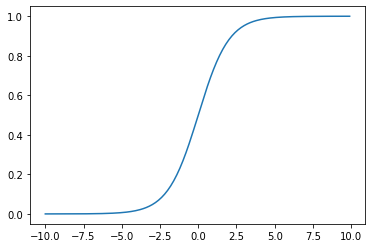

In [4]:
def sigmoid(x):
    return 1./(1. + np.exp(-x))

XX = np.arange(-10.,10.,0.1)
plt.plot(XX,sigmoid(XX));

<div class="alert alert-warning">
    
**Exercice: Weight invariance of the sigmoid neuron.**<br>
Explain why the weight invariance property does not hold for sigmoid activation functions? Can we regain this invariance property when $c\rightarrow\infty$?
</div>

<div class="alert alert-danger"><a href="#answer4" data-toggle="collapse"><b>Ready to see the answer? (click to expand)</b></a><br>
<div id="answer4" class="collapse">
    
This weight invariance property is not true for a sigmoid neuron because, for a given input $x$, multiplying all input weights by $c$ boils down to a shift by a multiplicative factor of $c$ on the horizontal scale of the sigmoid function above, which changes the value taken on the vertical axis. However, when $c\rightarrow\infty$, the sigmoid acts as a $step(w^Tx+b)$ function so tends to the same behavior as the perceptron.
</div>
</div>

<div class="alert alert-success">
    
**Beyond perceptrons.** Modern ANNs model logical functions as well as classification or regression tasks. For this purpose, one needs to find the correct weights so that the network actually produces the desired relation between inputs and outputs. Automatically tuning these weights from the data is the learning algorithm we need to design.
</div>

Note that the definition above restricts learning algorithms to finding optimized weights for a predefined set of neurons and connections. This is too reductive: finding the appropriate network structure is just as important. Unfortunately, Neural Architecture Search is still a pretty open research topic and, in this class, we will focus on weight learning for predefined network topologies.

So far, our progression of ideas has been:
- The human brain processes information efficiently, can we design an artificial computing method that mimics it?
- The biologicial neuron.
- Rosenblatt's perceptron: $f(x)=step(\sum w^T x+b)$ for a binary $x$ input vector.
- Networks of artificial neurons = Artifical Neural Networks (ANN).
- Generalization on activation functions and the particular case of the (logistic) sigmoid function.

If you get all the ideas behind each of these steps, we can move on to the next section.

# 3. <a id="sec3"></a>Artificial neural networks

**The idea:**
1. Each neuron processes a bit of information and passes it to its children.
2. Overall the network processes raw information into general concepts.

**Question:** can we mimic this system of connections in a learning system that adapts its parameters to the data it is exposed to?

<img src="img/neuron_bio.png" width="600px"></img>

**A formal neuron:**
$$z = \sigma(w^T x + b)$$
- $x$ is the input (the $n$-dimensional signal received through dendrites)
- $w$ is an $n$-dimensional vector of weights that give more or less importance to the elements of $x$
- $b$ is a scalar bias
- $\sigma$ is the neuron's activation function
- $z$ is the output (the signal along the "axon")

Note that the formal neuron is a *function*, very different from the impulses carried by axons in biological neurons.

<img src="img/artificial-neuron.png" width="250px">

**Computation graph**

A neural network is obtained by connecting some neuron's outputs to other neurons inputs. The goal of such a network is typically to learn how to imitate a certain function $f(x)$ for which we are given training data pairs $(x,y)$ with $y = f(x) + \textrm{noise}$. Such a network has thus three types of neurons:
- Input neurons. Those correspond to the different input variables $x_j$ describing our training examples.
- Output neurons. Those correspond to the targets $y$ in our examples.
- Hidden neurons. Any neurons that's not an input or an output neuron.

Therefore, a neural network is a computation graph, with inputs $x$ and outputs $y$, where nodes are neurons and edges connect the output signal of a node to one of the inputs of another.

**A little vocabulary:**
- A neural network is a computation graph.
- The input layer is composed of all input neurons.
- A layer is a (maximum) set of unconnected neurons, at the same depth from the input layer.
- The output layer is composed of all output neurons.
- All layers between the input and output layers are called hidden layers.
- A neural network organized in layers is called a feedforward NN.
- Some neural networks are not feedforward NNs and present loops. They are called Recurrent NN.
- A multilayer NN is often called a multilayer perceptron (for historical reasons)
- The output of a neuron is also called its activation.
- The vector of outputs for all neurons in a given layer is called the layer's activation.

<img src="img/nn.png" width="600px"></img>

**A bit of history:**<br>
1943: McCulloch (neurophysiologist) and Pitts (logician) suggest a first formal model for neurons.
> A logical calculus of the ideas immanent in nervous activity. McCulloch, W. and Pitts, W. Bulletin of Mathematical Biophysics, 5:115–133. (1943). [paper](https://link.springer.com/article/10.1007%2FBF02478259), [wikipedia](https://en.wikipedia.org/wiki/Artificial_neuron).

1949: Hebb suggests dendrites are strengthened whenever they are used.
> The Organization of Behavior. Hebb, D.O. New York: Wiley & Sons. (1949). [book](), [wikipedia](https://en.wikipedia.org/wiki/Hebbian_theory).

1951: [Minsky](https://en.wikipedia.org/wiki/Marvin_Minsky) designs a network of artificial neurons.
> [wikipedia](https://en.wikipedia.org/wiki/Stochastic_neural_analog_reinforcement_calculator)

1958: Roseblatt designs the Perceptron, with step activation functions.
> The perceptron: A probabilistic model for information storage and organization in the brain. Rosenblatt, F. Psychological Review, 65(6), 386-408. (1958) [wikipedia](https://en.wikipedia.org/wiki/Perceptron). [paper](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.588.3775)

1962: Widrow and Hoff suggest the delta-rule for adapting a network weights to obtain the desired output.
> [wikipedia](https://en.wikipedia.org/wiki/Least_mean_squares_filter)

1970s and 80s: The "quiet years", first AI winter. Attention turns to other methods while computing resources slowly increase. The Lighthill report halts AI research in the UK.
> Artificial Intelligence: A General Survey. James Lighthill. Artificial Intelligence: a paper symposium, UK Science Research Council. (1973).

1986: Rediscovery of the backpropagation algorithm (for multilayered perceptrons).
> Learning representations by back-propagating errors. Rumelhart, David E.; Hinton, Geoffrey E.; Williams, Ronald J. Nature. 323 (6088): 533–536. 1986. [paper](https://www.nature.com/articles/323533a0).

1990s: not enough computing power, not enough data, not enough recognition (while other methods like SVMs achieve good results). Second AI winter.

2000s: computing power + available data allow the training of deep multi-layered architectures (deep learning). Massive successes.

<div class="alert alert alert-success"> Feedforward neural networks are computational graphs where edges convey scalar values between neurons (nodes).<br>
A neuron's output results from the application of the activation function $\sigma$ to a linear combination of its inputs $z = \sigma(w^T x + b)$.<br>
The network parameters are all the neuron's input weights and biases. <br>
A neural network is a function that transforms its inputs into outputs by value propagation in the network.<br>
Learning a neural network consists in finding the $w$ and $b$ such that the network's output matches the function $f(x)$ that generated the data pairs $(x,y = f(x)\textrm{+noise})$.
</div>

**Universal approximation theorem:**<br>
If $\sigma$ is "S-shaped", then with enough neurons, a single layer, feed-forward NN can approximate any continuous function to an arbitrary precision.<br>
In other words, NN are universal approximators.<br>
<a href="UniversalApproximationTheorem.pdf">Let's take a formal look at this theorem.</a>

**Activation functions**
- step
$$\sigma(x) = 0 \textrm{ if }x\leq0\textrm{, }1\textrm{ otherwise}$$
- linear
$$\sigma(x) = x$$
- sigmoid or logistic (which we will consider by default for now)
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$
- hyperbolic tangent
$$\sigma(x) = \frac{e^{x} + e^{-x}}{e^{x} - e^{-x}}$$
- radial basis function (useful in some specific cases like Kohonen maps)
$$\sigma(x) = e^{-x^2}$$

# <a id="sec4"></a>4. Propagating values through a network

Let's define a neural network that has the following structure:
- 2 input neurons
- first hidden layer with 4 sigmoid neurons
- second hidden layer with 3 sigmoid neurons
- one ouput layer with an identity neuron

<img src="img/nn2.png" width="600px"></img>

Let's initialize its weights randomly (following a $\mathcal{N}(0,1)$ distribution).

In [5]:
sizes = [2,4,3,1]
num_layers = len(sizes)
biases = [np.random.randn(1,y) for y in sizes[1:]]
weights = [np.random.randn(out,inp) for inp,out in zip(sizes[:-1],sizes[1:])]

def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

<div class="alert alert-warning">
    
**Exercice:**<br>
Write a function that computes the forward propagation of the input $x=[1,2]$ through the network and returns the outputs and all intermediate activations.
</div>

In [6]:
# %load solutions/code1.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).